# Exploratory Data Analysis (EDA)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd

# Load the Titanic training and testing datasets
train_df = pd.read_csv(r"D:\Excelr\Assignments\XGBM & LGBM\Titanic_train.csv")
test_df = pd.read_csv(r"D:\Excelr\Assignments\XGBM & LGBM\Titanic_test.csv")

In [31]:
# Missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


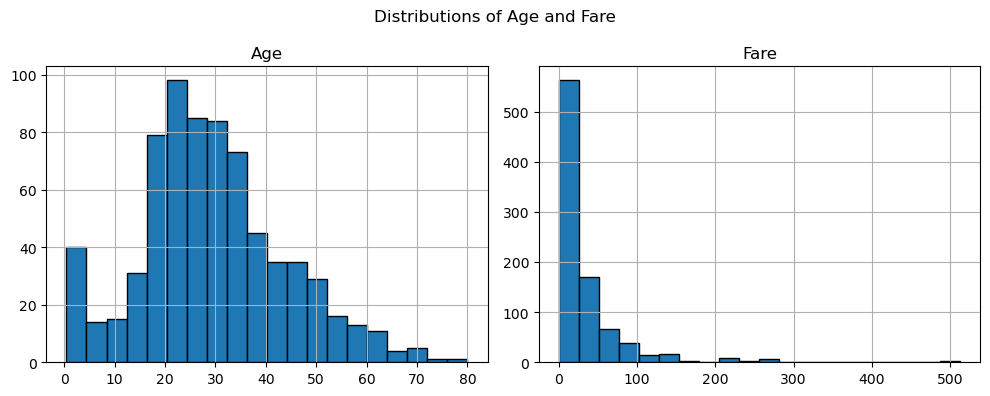

In [33]:
# Histograms for numerical features
train_df[['Age', 'Fare']].hist(bins=20, figsize=(10, 4), edgecolor='black')
plt.suptitle("Distributions of Age and Fare")
plt.tight_layout()
plt.show()

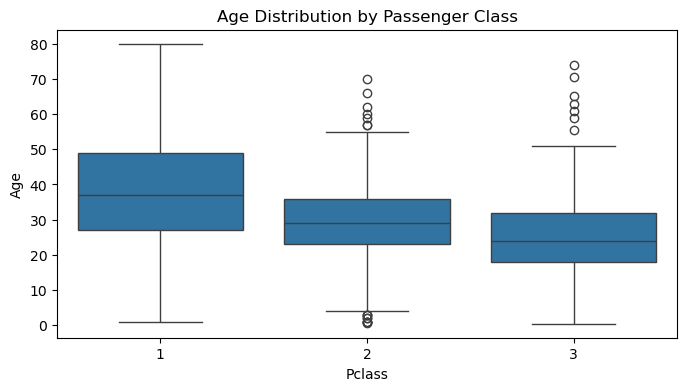

In [35]:
# Boxplot: Age vs Pclass
plt.figure(figsize=(8, 4))
sns.boxplot(data=train_df, x='Pclass', y='Age')
plt.title("Age Distribution by Passenger Class")
plt.show()

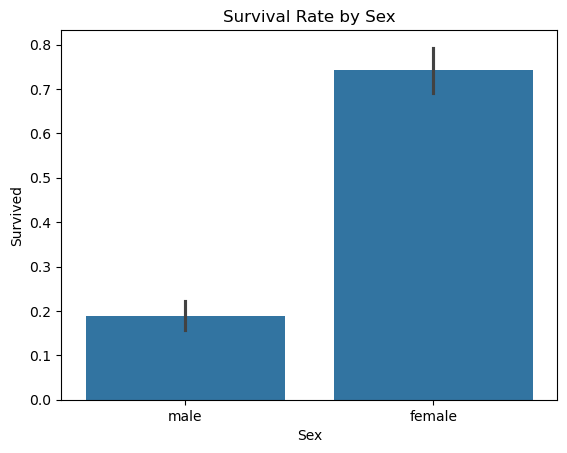

In [37]:
# Bar plot: Survival Rate by Sex
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.title("Survival Rate by Sex")
plt.show()

# Data Preprocessing

In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [42]:
# Drop columns not useful for prediction
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True)
test_df.drop(columns=drop_cols, inplace=True)

In [44]:
# Impute missing Age values with mean
imputer = SimpleImputer(strategy='mean')
train_df['Age'] = imputer.fit_transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])

In [46]:
# Fill missing Embarked values with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [49]:
# Encode categorical variables
label_cols = ['Sex', 'Embarked']
for col in label_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Building Predictive Models (LGBM & XGBoost)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [53]:
# Prepare features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

In [54]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# LightGBM Model
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [60]:
# XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)

In [62]:

# Evaluation
print("LightGBM Classification Report:\n", classification_report(y_val, lgbm_preds))
print("XGBoost Classification Report:\n", classification_report(y_val, xgb_preds))

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Comparative Analysis

In [67]:
# Accuracy scores
lgbm_acc = accuracy_score(y_val, lgbm_preds)
xgb_acc = accuracy_score(y_val, xgb_preds)

print(f"LightGBM Accuracy: {lgbm_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

LightGBM Accuracy: 0.8212
XGBoost Accuracy: 0.8101


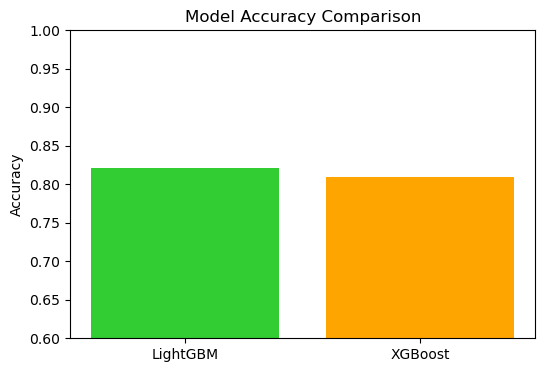

In [69]:
# Visualization
plt.figure(figsize=(6, 4))
plt.bar(['LightGBM', 'XGBoost'], [lgbm_acc, xgb_acc], color=['limegreen', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.show()